In [1]:
from utils import *
from predict import *
from layering import * 
from aha import * 
import matplotlib.pyplot as plt

Please enter Folder PATH below

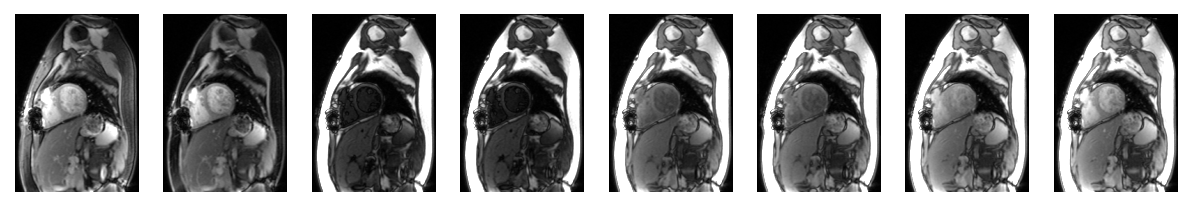

In [2]:
im, Invtime = read_molli_dir("PATH")

plt.figure(figsize=(10,3), dpi=150)
for i in range(im.shape[0]):
    plt.subplot(1,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
plt.show()

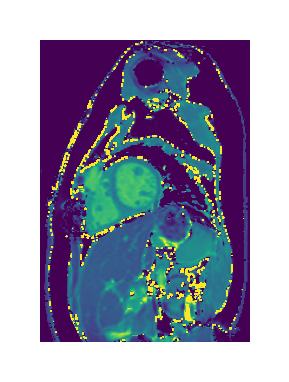

In [3]:
T1map = T1mapCal(im, Invtime)['T1map']
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(T1map, vmax=2500, vmin=300)
plt.show()

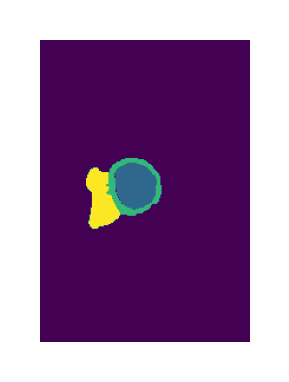

In [4]:
mask = predict_mask(T1map)
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(mask, vmax=3, vmin=0)
plt.show()

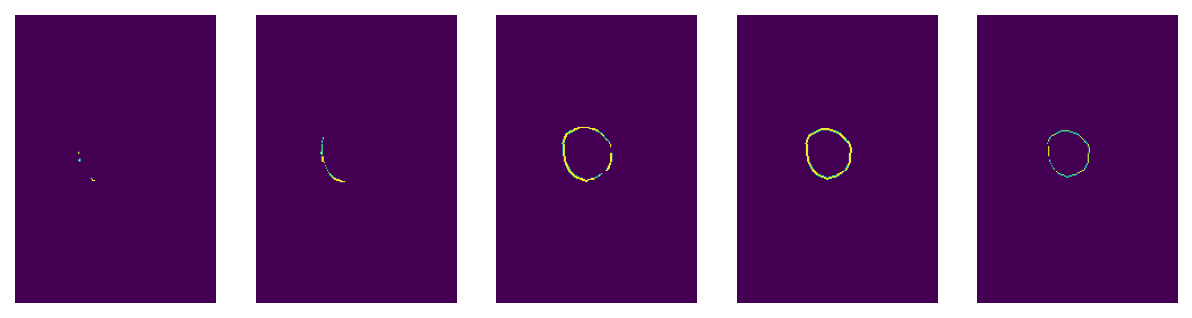

In [5]:
mask_layer = layering(mask, 5)
plt.figure(figsize=(10,3), dpi=150)
for i in range(len(mask_layer)):
    plt.subplot(1,len(mask_layer),i+1)
    plt.axis('off')
    plt.imshow(mask_layer[i], vmax=1, vmin=0)
plt.show()

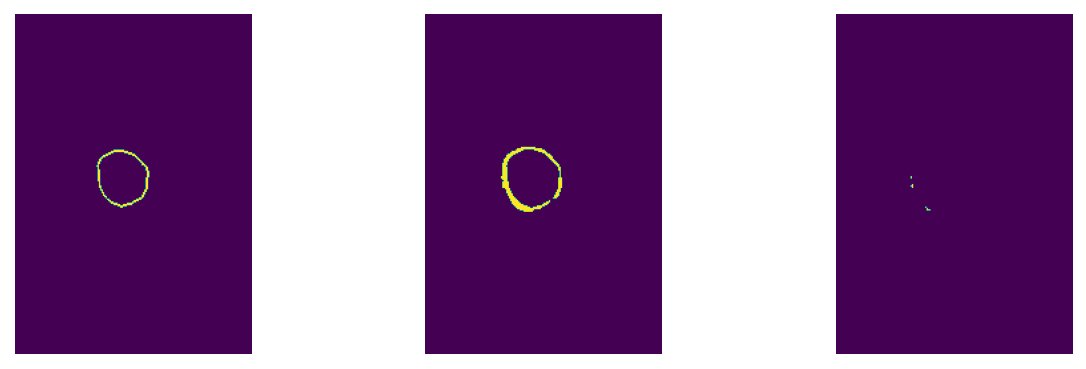

In [6]:
mask_layer = layering_percent(mask, 0.7, 0.3)
plt.figure(figsize=(10,3), dpi=150)
for i in range(len(mask_layer)):
    plt.subplot(1,len(mask_layer),i+1)
    plt.axis('off')
    plt.imshow(mask_layer[i], vmax=1, vmin=0)
plt.show()

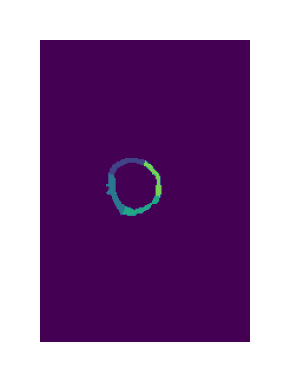

In [7]:
aha_seg = get_ahaseg(mask, nseg=4)
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(aha_seg, vmax=5, vmin=0)
plt.show()

Be careful! <br>
I use same slice to simulate the data of all slices

In [8]:
T1 = []

#########  Slice B  ############
aha_seg = get_ahaseg(mask, nseg=6)
T1map_i = np.ndarray(shape=(6,T1map.shape[0],T1map.shape[1]))
for i in range(6):
    T1map_i[i] = T1map*(aha_seg==i+1)
    T1map_i[i][T1map_i[i] == 0] = np.nan
    T1.append(np.nanmedian(T1map_i[i]))

#########  Slice M  ############
aha_seg = get_ahaseg(mask, nseg=6)
T1map_i = np.ndarray(shape=(6,T1map.shape[0],T1map.shape[1]))
for i in range(6):
    T1map_i[i] = T1map*(aha_seg==i+1)
    T1map_i[i][T1map_i[i] == 0] = np.nan
    T1.append(np.nanmedian(T1map_i[i]))

#########  Slice A  ############
aha_seg = get_ahaseg(mask, nseg=4)
T1map_i = np.ndarray(shape=(4,T1map.shape[0],T1map.shape[1]))
for i in range(4):
    T1map_i[i] = T1map*(aha_seg==i+1)
    T1map_i[i][T1map_i[i] == 0] = np.nan
    T1.append(np.nanmedian(T1map_i[i]))

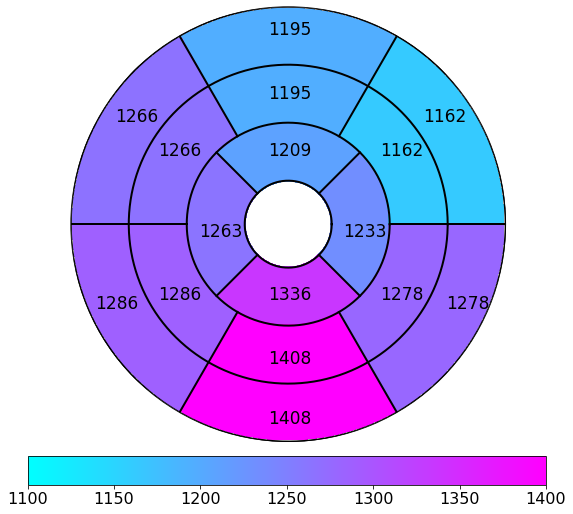

In [9]:
# Create the fake data
data = T1


# Make a figure and axes with dimensions as desired.
fig, ax = plt.subplots(figsize=(8, 8), nrows=1, ncols=1,
                    subplot_kw=dict(projection='polar'))
fig.canvas.manager.set_window_title('Left Ventricle Bulls Eyes (AHA)')

# Create the axis for the colorbars
axl = fig.add_axes([0.06, 0.05, 0.9, 0.05])


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=1100, vmax=1400)
# Create an empty ScalarMappable to set the colorbar's colormap and norm.
# The following gives a basic continuous colorbar with ticks and labels.
cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
            cax=axl, orientation='horizontal') # cax=axl, orientation='horizontal', label='T1(ms)')
cbar.ax.tick_params(labelsize=16)


# Create the 17 segment model
bullseye_plot(ax, data,cmap=cmap, norm=norm)
# ax.set_title('Bulls Eye (AHA)')
# temp_T = np.around(T1, decimals=2, out=None)
temp_T = [int(x) for x in T1]

for text,xytext, color in zip(*[temp_T,[(0.465, 0.825),(0.2, 0.675),(0.165, 0.35),(0.465, 0.15),(0.775, 0.35),(0.735, 0.675),(0.465, 0.715),(0.275, 0.615),(0.275, 0.365),(0.465, 0.255),(0.66, 0.365),(0.66, 0.615),(0.465, 0.615),(0.345, 0.475),(0.465, 0.365),(0.595, 0.475)],['k','k','k','k','k','k','k','k','k','k','k','k','k','k','k','k']]):
    ax.annotate(text,
                xy=(0,0),  # theta, radius
                xytext=xytext,    # fraction, fraction
                textcoords='figure fraction',
                horizontalalignment='left',
                verticalalignment='bottom',
                color=color,
                size=17
                )

plt.show()
plt.close('all')